In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
import numpy as np
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import time 
import random
import datetime

In [34]:
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

In [3]:
business = pd.read_csv(r"D:\VS-workspace\test\dataset\business.csv")

In [4]:
business.head()

,business_id,name,address,city,state,latitude,longtitude,stars,review_count,is_open,categories
0,rncjoVoEFUJGCUoC1JgnUA,Peoria Income Tax Service,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",Peoria,AZ,33.581867,-112.241596,5.0,3,True,Accountants; Professional Services; Tax Servic...
1,0FNFSzCFP_rGUoJx8W7tJg,Bike Doctor,"2149 W Wood Dr\nPhoenix, AZ 85029",Phoenix,AZ,33.604054,-112.105933,5.0,5,True,Sporting Goods; Bikes; Shopping
2,usAsSV36QmUej8--yvN-dg,Food City,"845 W Southern Ave\nPhoenix, AZ 85041",Phoenix,AZ,33.392210,-112.085377,3.5,5,True,Food; Grocery
3,PzOqRohWw7F7YEPBz6AubA,Hot Bagels & Deli,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",Glendale Az,AZ,33.712797,-112.200264,3.5,14,True,Food; Bagels; Delis; Restaurants
4,gtQzAiy7D-dPU8WzT3jX3Q,Barney's New York Co-op,The Americana at Brand\n869 Americana Way\nGle...,Glendale,CA,33.607766,-112.481632,4.5,6,True,Women's Clothing; Fashion; Shopping


## 1.Những doanh nghiệp được đánh giá cao nhất 


In [5]:
def top_rank_business(business) :
    business_top_rank = business[(business['stars'] >= 4.5) & (business['review_count'] > 200)] 
    business_top_rank = business[['business_id', 'name', 'stars', 'review_count' , 'categories' ]].sort_values(by = 'review_count' , ascending = False)[:20]
    plt.Figure(figsize=(16,8))
    sns.barplot(data = business_top_rank , x = 'review_count' , y = 'name' ,palette = 'viridis' ) 
    plt.xlabel('TOTAL REVIEW' , fontsize = 15)
    plt.ylabel('BUSINESS NAME' , fontsize = 15)
    plt.title('TOP RATED BUSINESSES' , fontsize = 20)
    plt.show()
    return business_top_rank

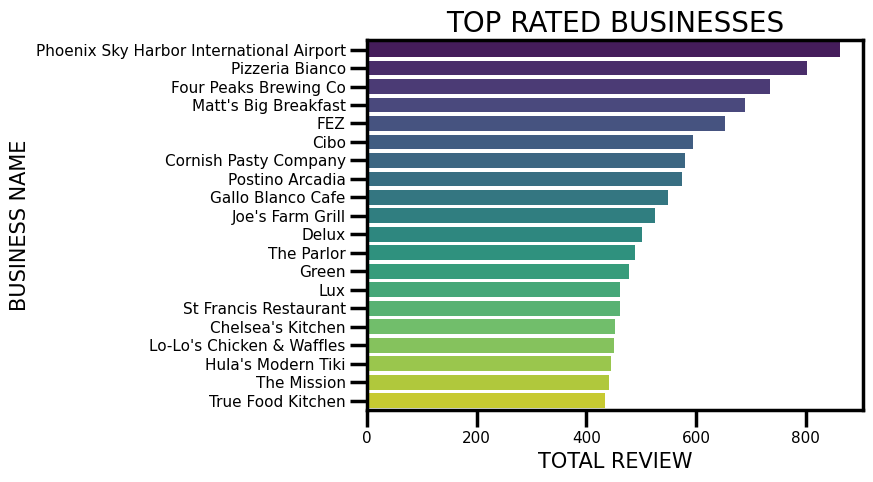

In [6]:
business_top_rank = top_rank_business(business)

## 2.Những loại hình của doanh nghiệp được đánh giá cao nhất 

In [7]:
def top_rank_cat(business_top_rank) :    
    cat_top_rated_list = business_top_rank['categories'].str.split(';').sum()
    cat_top_rated_list = [x.strip() for x in cat_top_rated_list]

    dict = {}
    for c in range(len(cat_top_rated_list)):
        dict[cat_top_rated_list[c]] = cat_top_rated_list.count(cat_top_rated_list[c])

    cat_top_rated = pd.DataFrame.from_dict(data = dict , orient = 'index')
    cat_top_rated.reset_index(inplace = True)
    cat_top_rated.columns
    cat_top_rated.rename(columns = {'index':'categories' , 0:'occurance'} , inplace = True)
    cat_top_rated.sort_values(by = 'occurance' , ascending = False)[:15]
    plt.figure(figsize=(16,8))
    sns.barplot(data = cat_top_rated, x = 'occurance', y = 'categories', palette = 'Set3')
    plt.ylabel('Business Category', fontsize=15)
    plt.xlabel('Total Occurence', fontsize=15)
    plt.title('Categories of Top Reviewed Businesses', fontsize=20)
    plt.show();

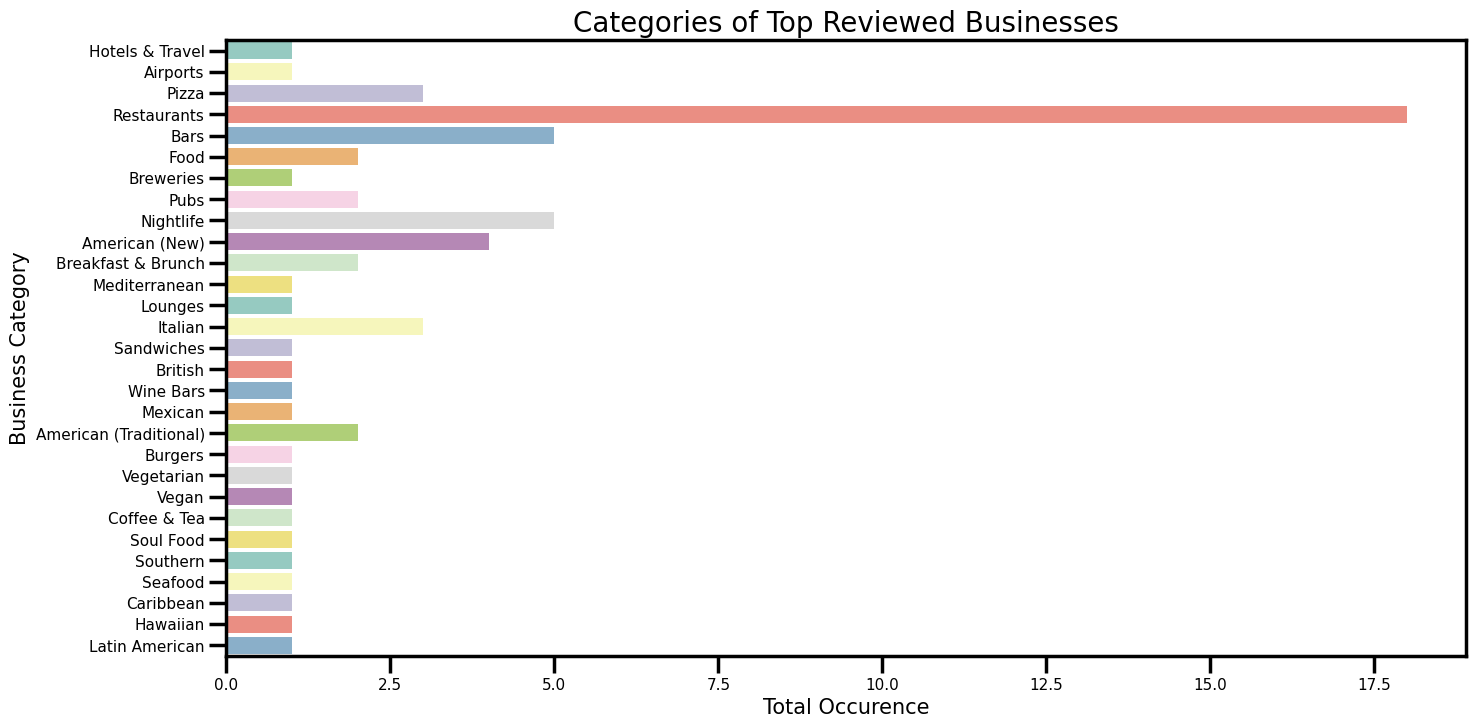

In [8]:
top_rank_cat(business_top_rank)

## 3.Những đánh giá trong từng năm 

3.1. Tổng số đánh giá trong từng năm

In [9]:
review = pd.read_csv(r"D:\VS-workspace\test\dataset\review.csv")

In [10]:
review

,review_id,user_id,business_id,stars,date,text,useful
0,fWKvX83p0-ka4JS3dc6E5A,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,5,2011-01-26,My wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,0a2KyEL0d3Yb1V6aivbIuQ,ZRJwVLyzEJq1VAihDhYiow,5,2011-07-27,I have no idea why some people give bad review...,0
2,IESLBzqUCLdSzSqm0eCSxQ,0hT2KtfLiobPvh6cDC8JQg,6oRAC4uyJCsJl1X0WZpVSA,4,2012-06-14,love the gyro plate. Rice is so good and I als...,1
3,G-WvGaISbqqaMHlNnByodA,uZetl9T0NcROGOyFfughhg,_1QQZuf4zZOyFCvXc0o6Vg,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2
4,1uJFq2r5QfJG_6ExMRCaGw,vYmM4KTsC8ZfQBg-j5MWkw,6ozycU1RpktNG2-1BroVtw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,0
...,...,...,...,...,...,...,...
229125,f9JaiNg_FMoPNWxt7MlbZQ,6e7pZofhDuIlD_rX2oYirQ,vnffHkFJbmd-J3OaBbK2Eg,2,2011-04-14,I really wanted to like this place because it'...,0
229126,QDWRP1pW5r0huIBAoGmFyg,dDNfSFT0VApxPmURclX6_g,l5oUrgQ190l8CcN8uzd_pA,1,2011-01-23,My husband I stayed here for two nights. Of c...,2
229127,JmR3yk7JlS1LVVxtIc3xBQ,M5wHt6Odh1k5v0tIjqd8DQ,-EctXOb3B7T177jGYUhjVA,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,0
229128,z5b2p5TbCg0uaIiIe8n62w,jopndPrv-H5KW2CfScnw9A,YQvg0JCGRFUkb6reMMf3Iw,3,2011-01-18,I have to take a star off for the spotty servi...,2


In [11]:
review['date'] = pd.to_datetime(review['date'] , format = '%Y-%m-%d')
review['year'] = review.date.dt.year

In [12]:
def total_review_per_year(date_min , date_max , review) :
    drop_range = date_max - date_min
    review_per_year = review.groupby(['year']).size().reset_index(name = 'count').drop([0,drop_range])
    plt.Figure(figsize = (16,8))
    sns.lineplot(data = review_per_year , y = 'count' , x = 'year' , palette = 'viridis')
    plt.xlabel('YEAR' , fontsize = 12)
    plt.ylabel('NUMBER OF REVIEWS' ,fontsize = 12)
    plt.title('TOTAL NUMBER OF REVIEWS PER YEAR' ,fontsize = 15) 
    plt.show()

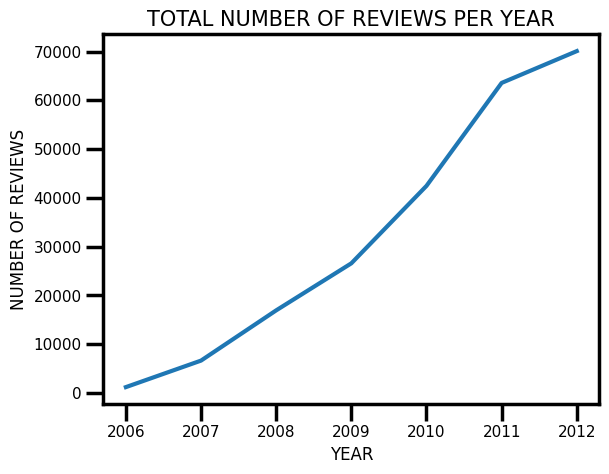

In [13]:
total_review_per_year(review['year'].min() , review['year'].max() , review)

3.2.Tổng lượt đánh giá của người dùng đến một số doanh nghiệp trong mỗi năm

In [14]:
result = pd.merge(review, business , on = 'business_id' , how = 'inner')

In [15]:
def review_business_per_year(result) :
    
    pizzeria_blanco = result.loc[result['name'] == 'Pizzeria Bianco'].sort_values(by = 'year', ascending=False)
    pizzeria_blanco_counts = pizzeria_blanco.groupby(['year']).size().reset_index(name='counts').drop([0,8])
    pizzeria_blanco_counts = pd.DataFrame(pizzeria_blanco_counts['counts'].values, pizzeria_blanco_counts['year'].values).reset_index()
    pizzeria_blanco_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)


    postino_arcadia = result.loc[result['name'] == 'Postino Arcadia'].sort_values(by = 'year', ascending=False)
    postino_arcadia_counts = postino_arcadia.groupby(['year']).size().reset_index(name='counts').drop([0,7])
    postino_arcadia_counts = pd.DataFrame(postino_arcadia_counts['counts'].values, postino_arcadia_counts['year'].values).reset_index()
    postino_arcadia_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)


    phoenix_sky = result.loc[result['name'] == 'Phoenix Sky Harbor International Airport'].sort_values(by = 'year', ascending=False)
    phoenix_sky_counts = phoenix_sky.groupby(['year']).size().reset_index(name='counts').drop([7])
    phoenix_sky_counts = pd.DataFrame(phoenix_sky_counts['counts'].values, phoenix_sky_counts['year'].values).reset_index()
    phoenix_sky_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)


    joes_farm = result.loc[result['name'] == "Joe's Farm Grill"].sort_values(by = 'year', ascending=False)
    joes_farm_counts = joes_farm.groupby(['year']).size().reset_index(name='counts').drop([6])
    joes_farm_counts = pd.DataFrame(joes_farm_counts['counts'].values, joes_farm_counts['year'].values).reset_index()
    joes_farm_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

    morning_glory_cafe = result.loc[result['name'] == "Morning Glory Cafe"].sort_values(by = 'year', ascending=False)
    morning_glory_cafe_counts = joes_farm.groupby(['year']).size().reset_index(name='counts').drop([6])
    morning_glory_cafe_counts = pd.DataFrame(morning_glory_cafe_counts['counts'].values, morning_glory_cafe_counts['year'].values).reset_index()
    morning_glory_cafe_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)

    chaparral_dog_park = result.loc[result['name'] == "Chaparral Dog Park"].sort_values(by = 'year', ascending=False)
    chaparral_dog_park_counts = joes_farm.groupby(['year']).size().reset_index(name='counts').drop([6])
    chaparral_dog_park_counts = pd.DataFrame(chaparral_dog_park_counts['counts'].values, chaparral_dog_park_counts['year'].values).reset_index()
    chaparral_dog_park_counts.rename(columns={"index": "year", 0: "counts"}, inplace = True)


    fig, ((ax1, ax2), (ax3, ax4) , (ax5 , ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(16, 7))

    sns.barplot(data = pizzeria_blanco_counts, x = 'year', y = 'counts', palette = 'Set2', ax=ax1)
    ax1.set_title('Pizzeria Blanco',fontsize=10)

    sns.barplot(data = postino_arcadia_counts,x = 'year', y = 'counts', palette = 'Set1', ax=ax2)
    ax2.set_title('Postino Arcadia',fontsize=10)

    sns.barplot(data = phoenix_sky_counts,x = 'year', y = 'counts', palette = 'Paired', ax=ax3)
    ax3.set_title('Phoenix Sky Airport',fontsize=10)

    sns.barplot(data = joes_farm_counts,x = 'year', y = 'counts', palette = 'husl', ax=ax4)
    ax4.set_title("Joe's Farm Grill",fontsize=10)

    sns.barplot(data = morning_glory_cafe_counts,x = 'year', y = 'counts', palette = 'coolwarm', ax=ax5)
    ax5.set_title("Morning Glory Cafe",fontsize=10)

    sns.barplot(data = chaparral_dog_park_counts,x = 'year', y = 'counts', palette = 'Set3', ax=ax6)
    ax6.set_title("Chaparral Dog Park",fontsize=10)

    plt.show();

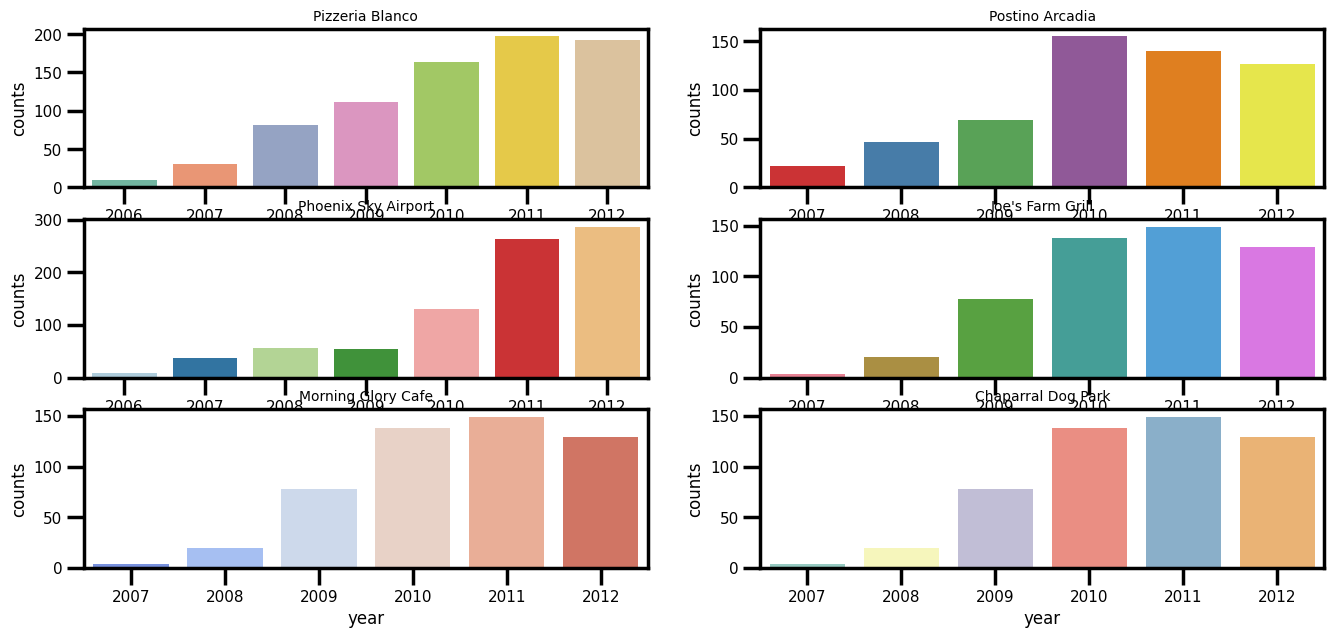

In [16]:
review_business_per_year(result)

## 4.Những loại hình được những đánh giá xấu của các doanh nghiệp

In [17]:
def top_bad_review(result) : 
    bad_stars = result[(result['stars_x'] < 2)].drop_duplicates(subset = ['name'])
    bad_stars = bad_stars[['name','stars_x','categories']]


    bad_reviews_list = bad_stars.categories.str.split(';').sum()
    bad_reviews_list = [x.strip() for x in bad_reviews_list]


    dict = {}
    for c in range(len(bad_reviews_list)):
        dict[bad_reviews_list[c]] = bad_reviews_list.count(bad_reviews_list[c])
        

    cat_bad_reviews = pd.DataFrame.from_dict(data = dict, orient = 'index')
    cat_bad_reviews.reset_index(inplace = True)
    cat_bad_reviews.columns = ['category', 'occurance']
    cat_bad_reviews = cat_bad_reviews.sort_values(by='occurance', ascending=False).reset_index().drop(columns='index')

    size = cat_bad_reviews.nlargest(15, 'occurance')['occurance']
    label = cat_bad_reviews.nlargest(15, 'occurance')['category']
    cmap = plt.get_cmap("tab10")
    colors = cmap(np.array([10, 2, 3, 4, 5, 6, 7, 8, 9, 12]))

    fig1, ax1 = plt.subplots(figsize=(20,8))
    ax1.pie(size,labels=label, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.axis('equal')
    plt.title('Top 15 Categories with the highest number of bad reviews', fontsize = 15)
    plt.show()

In [18]:
result.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'date', 'text',
       'useful', 'year', 'name', 'address', 'city', 'state', 'latitude',
       'longtitude', 'stars_y', 'review_count', 'is_open', 'categories'],
      dtype='object')

In [19]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229130 entries, 0 to 229129
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    229130 non-null  object        
 1   user_id      229130 non-null  object        
 2   business_id  229130 non-null  object        
 3   stars        229130 non-null  int64         
 4   date         229130 non-null  datetime64[ns]
 5   text         229124 non-null  object        
 6   useful       229130 non-null  int64         
 7   year         229130 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 13.1+ MB


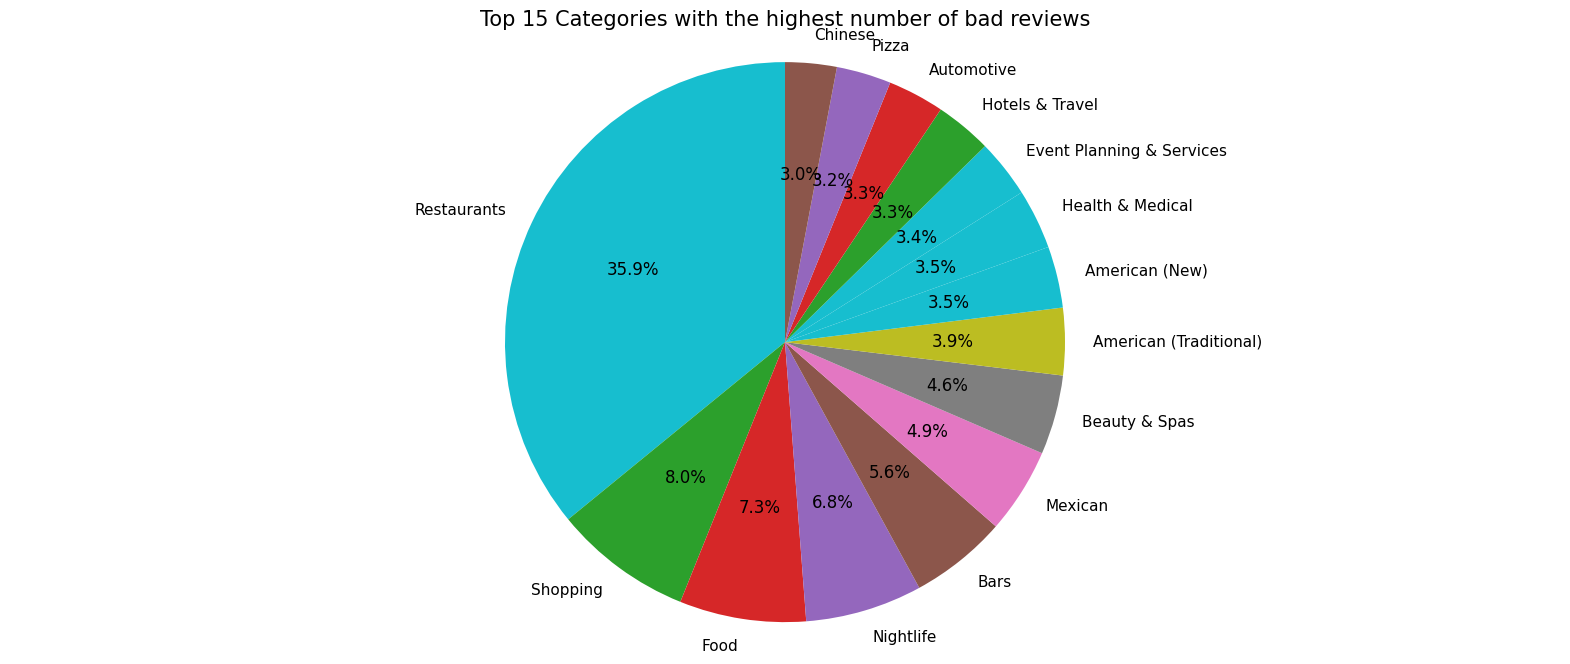

In [20]:
top_bad_review(result)

## 5.Những từ ngữ được dùng trong những đánh giá xấu 

In [21]:
bad_words = result[result['stars_x'] == 1]
bad_words = bad_words[['name', 'stars_x', 'text', 'categories']].reset_index().drop(columns='index')

In [22]:
%%time

nlp = spacy.load('en_core_web_sm')

doc = list(nlp.pipe(bad_words.text))

CPU times: total: 5min 49s
Wall time: 5min 51s


In [23]:
def extract_tokens(doc:spacy.tokens.doc.Doc):
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc]


def df_tokens(doc):
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, d in enumerate(doc):
        meta = extract_tokens(d)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

In [24]:
clean_doc = df_tokens(doc)
clean_doc.head()

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,U,0,u,ORG,NN,nsubj,NOUN,False,True,False,False
1,0,can,1,can,,MD,aux,AUX,True,True,False,False
2,0,go,2,go,,VB,ROOT,VERB,True,True,False,False
3,0,there,3,there,,RB,advmod,ADV,True,True,False,False
4,0,n,4,n,,RBR,cc,ADV,False,True,False,False


Số lượng từ trong mỗi bài đánh giá

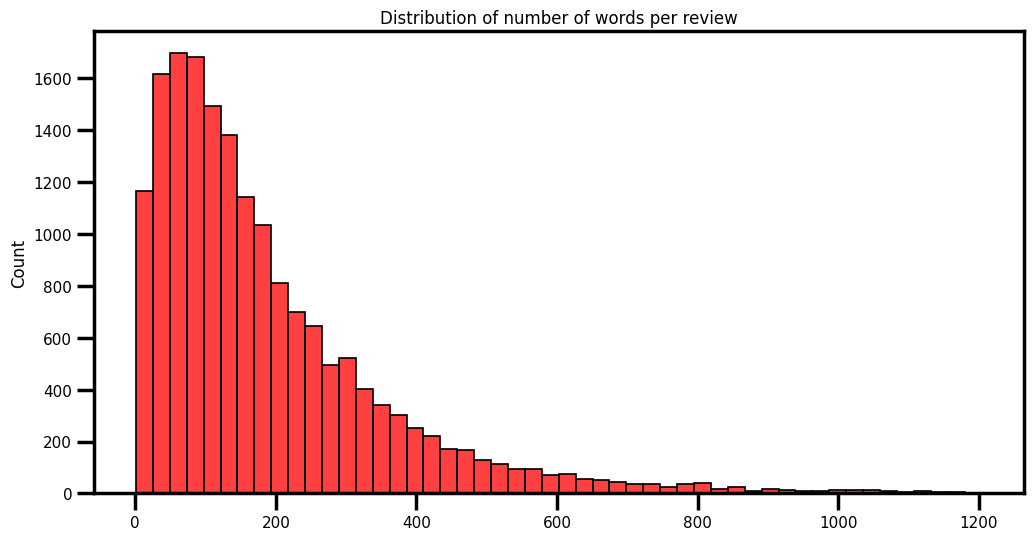

In [25]:

plt.figure(figsize=(12,6))
sns.histplot(clean_doc.groupby("doc_id").size(), bins = 50, color = 'red')
plt.title('Distribution of number of words per review', fontsize = 12)
plt.show();

Các thực thể trong tập dữ liệu

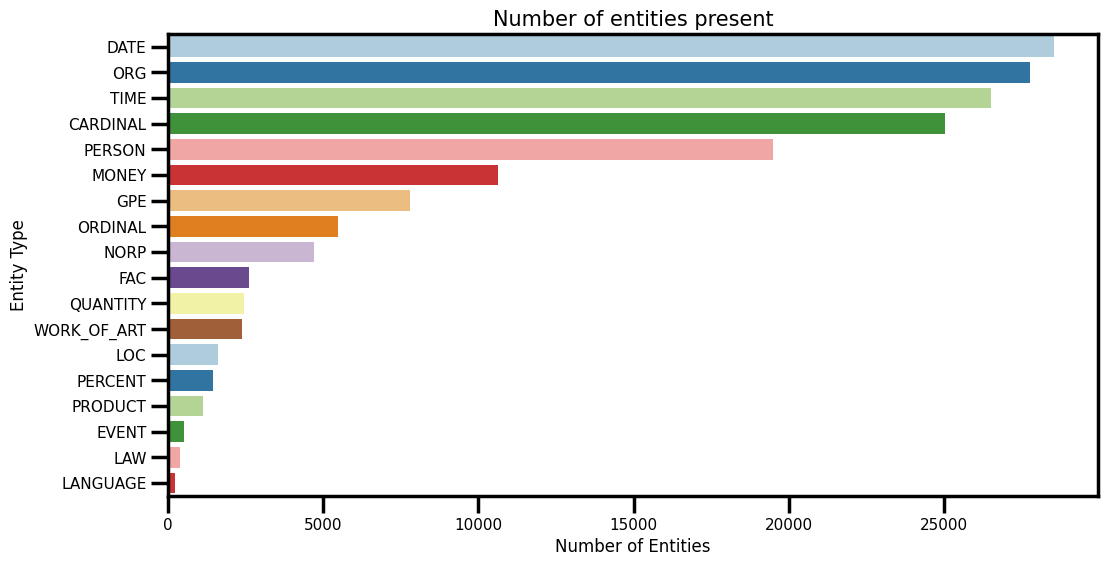

In [26]:

freq_ent = clean_doc.query("ent_type != ''").ent_type.value_counts().reset_index()
freq_ent.columns = ['ent_type', 'count'] 

plt.figure(figsize=(12,6))
sns.barplot(data = freq_ent, y = 'ent_type', x = 'count', palette = 'Paired')
plt.ylabel('Entity Type', fontsize=12)
plt.xlabel('Number of Entities', fontsize=12)
plt.title('Number of entities present', fontsize=15)
plt.show();

Các từ ngữ được dùng trong những đánh giá xấu

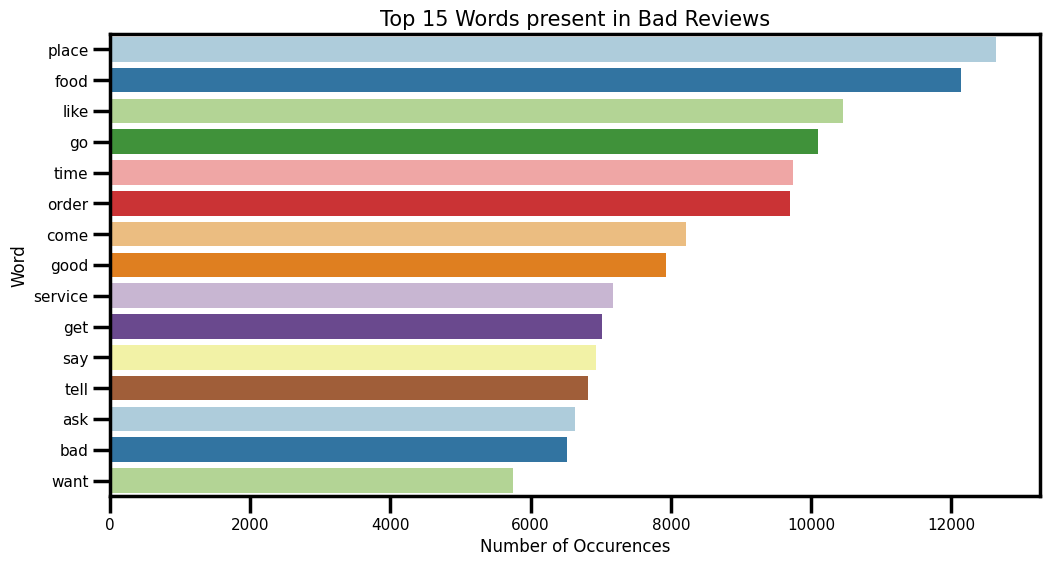

In [27]:

top_bad_words = clean_doc.query("is_stop == False & is_punct == False").lemma.value_counts().head(19).reset_index()
top_bad_words = top_bad_words.drop([0, 1, 10, 17])
top_bad_words.columns = ['lemma' , 'count']

plt.figure(figsize=(12,6))
sns.barplot(data = top_bad_words, y = 'lemma', x = 'count', palette = 'Paired')
plt.ylabel('Word', fontsize=12)
plt.xlabel('Number of Occurences', fontsize=12)
plt.title('Top 15 Words present in Bad Reviews', fontsize=15)
plt.show();

## 6. Phân tích cảm xúc người dùng

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
sid = SentimentIntensityAnalyzer()

In [30]:
def analyze_sentiment(review) :
    reviews = review[['text', 'stars']].reset_index().drop(columns='index')
    reviews['label'] = reviews['stars'].apply(lambda s: 'positive' if s >= 4 else ('negative' if s <= 2 else 'neutral'))

    reviews['polarity_scores'] = reviews['text'].apply(lambda text: sid.polarity_scores(str(text)))
    reviews['compound_score']  = reviews['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
    reviews['compound_label'] = reviews['compound_score'].apply(lambda s: 'negative' if s < 0 else ('neutral' if s < 0.5 else 'positive'))
    reviews.head()

    print('Accuracy score: ', accuracy_score(reviews.label, reviews.compound_label))
    print('Classification Report:\n', classification_report(reviews.label, reviews.compound_label))
    print(confusion_matrix(reviews.label, reviews.compound_label))
    disp = ConfusionMatrixDisplay(confusion_matrix(reviews.label, reviews.compound_label), 
                                display_labels=['negative', 'neutral', 'positive'])
    disp.plot()
    plt.show

Accuracy score:  0.714498319731157
Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.39      0.49     38245
     neutral       0.23      0.10      0.14     35268
    positive       0.76      0.93      0.84    155617

    accuracy                           0.71    229130
   macro avg       0.55      0.47      0.49    229130
weighted avg       0.66      0.71      0.67    229130

[[ 14804   5339  18102]
 [  3332   3487  28449]
 [  3729   6466 145422]]


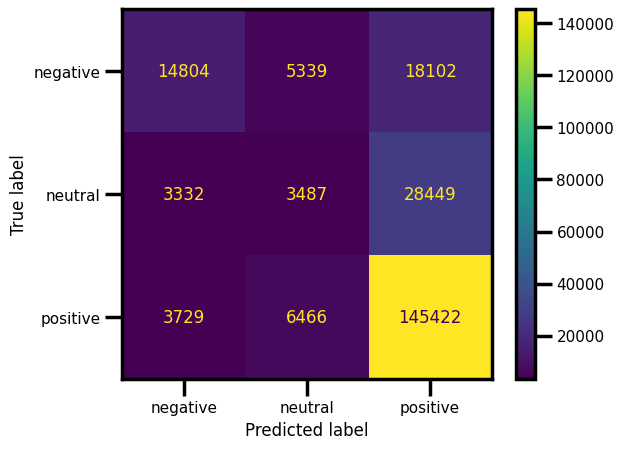

In [31]:
analyze_sentiment(review)

## 7.Cập nhật dữ liệu theo thời gian thực

In [46]:
def evaluate_realtime_reviews(reviews_data , callback , interval = 2 , sep = "\n---\n") : 
    for i in range(0 , len(reviews_data) ,  random.randint(2,5)) : 
        data = reviews_data[i:i + random.randint(2,5)]
        if not data :
            break 
        review_text = sep.join([f"[{d['date']}] ({d['stars']}⭐) {d['text']}" for d in data ])

        callback_data = {
            'time' : datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") ,
            'reviewscount' : len(data) ,
            'sep' : sep ,
            'reviews' : review_text
        }

        callback(callback_data) 

        time.sleep(interval)

In [44]:
def update(data) :
    print(f"[{data['time']}] : Nhận được {data['reviewscount']} lượt đánh giá : ")
    print(data['reviews'])

In [51]:
test_reviews = [
    {
        "review_id": "r1",
        "user_id": "u1",
        "business_id": "b1",
        "stars": 5,
        "date": "2023-07-01 09:12:45",
        "text": "Quán cà phê tuyệt vời, nhân viên thân thiện!",
        "useful": 12
    },
    {
        "review_id": "r2",
        "user_id": "u2",
        "business_id": "b3",
        "stars": 3,
        "date": "2023-07-02 10:45:10",
        "text": "Không gian ổn nhưng đồ uống bình thường.",
        "useful": 5
    },
    {
        "review_id": "r3",
        "user_id": "u3",
        "business_id": "b5",
        "stars": 1,
        "date": "2023-07-03 11:20:55",
        "text": "Phục vụ quá tệ, phải chờ 40 phút mới có đồ.",
        "useful": 20
    },
    {
        "review_id": "r4",
        "user_id": "u4",
        "business_id": "b2",
        "stars": 4,
        "date": "2023-07-04 15:30:20",
        "text": "Đồ ăn ngon, giá hợp lý.",
        "useful": 7
    }
]



In [52]:
evaluate_realtime_reviews(test_reviews , update , interval = 2)

[2025-10-12 12:01:39] : Nhận được 3 lượt đánh giá : 
[2023-07-01 09:12:45] (5⭐) Quán cà phê tuyệt vời, nhân viên thân thiện!
---
[2023-07-02 10:45:10] (3⭐) Không gian ổn nhưng đồ uống bình thường.
---
[2023-07-03 11:20:55] (1⭐) Phục vụ quá tệ, phải chờ 40 phút mới có đồ.
[2025-10-12 12:01:41] : Nhận được 1 lượt đánh giá : 
[2023-07-04 15:30:20] (4⭐) Đồ ăn ngon, giá hợp lý.


In [42]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229130 entries, 0 to 229129
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    229130 non-null  object        
 1   user_id      229130 non-null  object        
 2   business_id  229130 non-null  object        
 3   stars        229130 non-null  int64         
 4   date         229130 non-null  datetime64[ns]
 5   text         229124 non-null  object        
 6   useful       229130 non-null  int64         
 7   year         229130 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 13.1+ MB
